In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

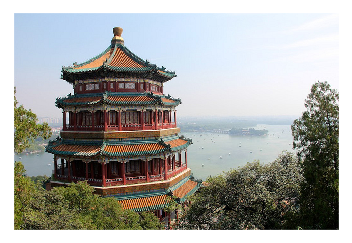

In [118]:
from sklearn.datasets import load_sample_image

#adding image from current directory

from IPython.display import Image, display

china=load_sample_image('china.jpg')
ax=plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [119]:
china.shape
show=list(china.shape)
print(show)

[427, 640, 3]


In [120]:
china.shape

(427, 640, 3)

In [121]:
#dimensions of image
# all the pixel values in the china
china


array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [122]:
#reshape the data to n samples and n features and rescale the colors so that they lie between 0 and 1
data=china/255.0 #use 0...1 scale
data=data.reshape(show[0]*show[1],show[2])
#reshaping the the data in 'data'
data.shape


(273280, 3)

In [123]:
#show data
data
# we divided the whole data by 255.0 so that the data will be in range 0 and 1

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [124]:
#visualize these pixels in this color space, using a subset of 10000 pixels for  efficiency
def plot_pixels(data,title,colors=None, N=10000):
    if colors is None:
        colors=data
    #Choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B = data[i].T
    
    fig, ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='red',ylabel='green',xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='red',ylabel='blue',xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title,size=20)
   

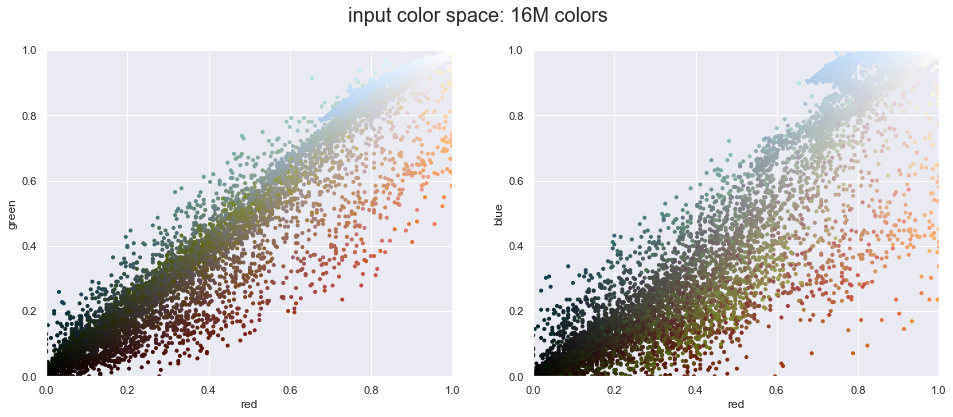

In [125]:
 plot_pixels(data,title='input color space: 16M colors')

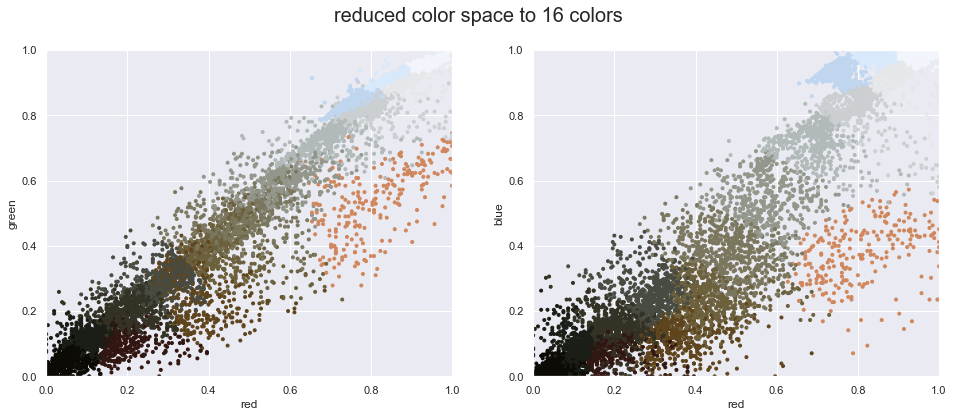

In [126]:
import warnings; warnings.simplefilter('ignore')
# the above line fixes numpy issue if there is any

from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,title="reduced color space to 16 colors")

Text(0.5, 1.0, '16 colr image')

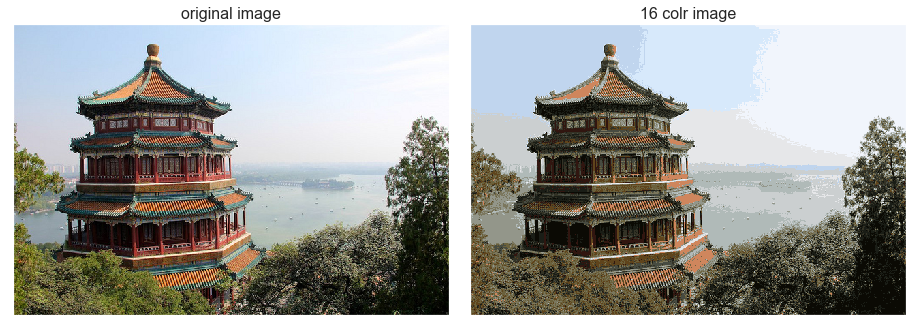

In [127]:
china_recolored=new_colors.reshape(china.shape)

fig,ax =plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.050)

ax[0].imshow(china)
ax[0].set_title('original image',size=16)

ax[1].imshow(china_recolored)
ax[1].set_title('16 colr image',size=16)